<a href="https://colab.research.google.com/github/ablejo1234/d2l-pytorch/blob/master/dl_final_project_code_(COSE474).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection Project Code




# 0. Import Necessary Modules

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set working path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Data Loading

In [3]:
# read "creditcard.csv" file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DLProject/creditcard.csv", delimiter=',', dtype=np.float32)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


The dataset has 284807 observations and 31 variables.

# 2. Data Preprocessing

## Missing Value Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

Dataset with 284807 observations and 31 variables(features). There seem to be no missing values(NA) here.

In [5]:
df.isnull().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

0 missing values(NA)! No need for preprocessing here.

## Correlation

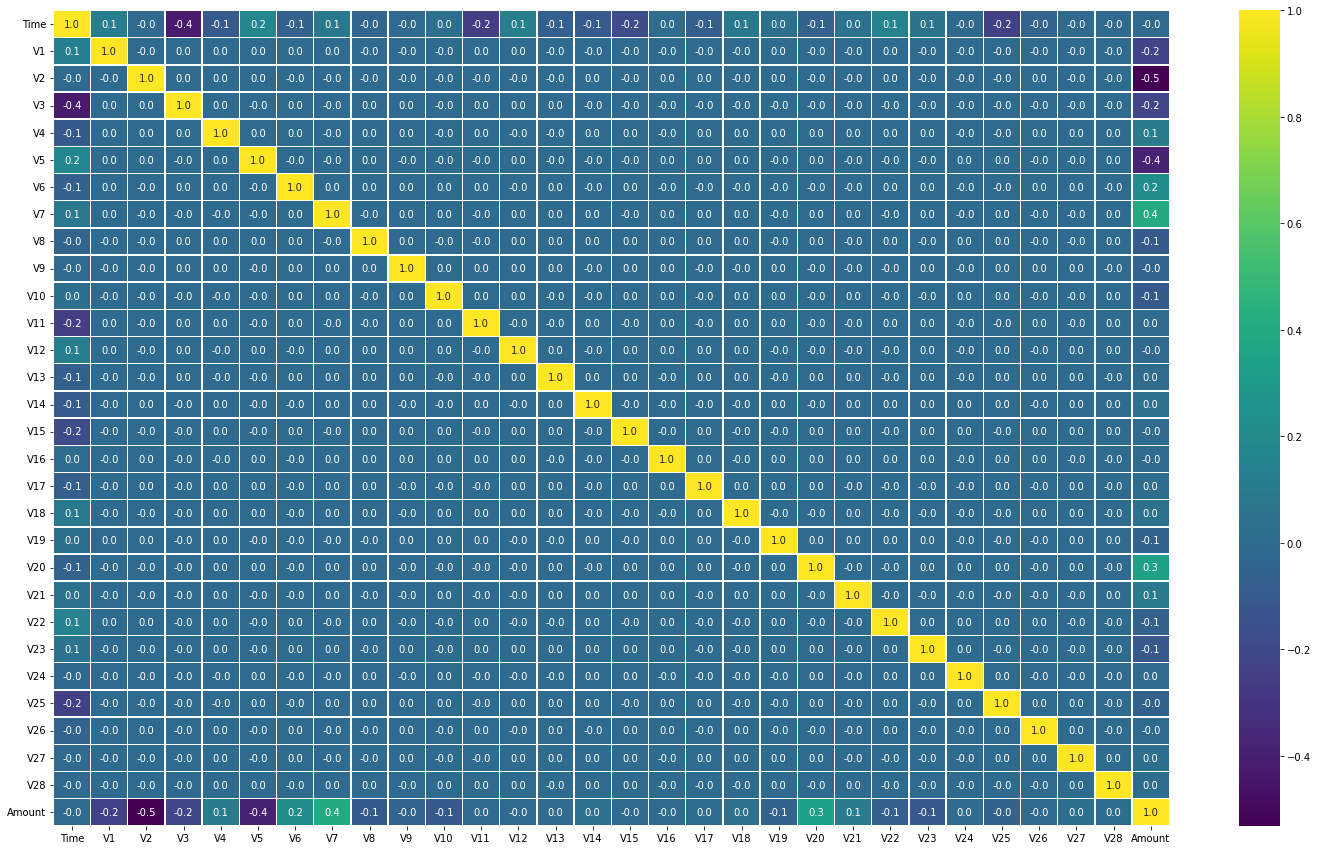

In [6]:
# check correlation
df_num = df.drop("Class",axis=1)
corr = df_num.corr()

# correlation plot
f, ax = plt.subplots(figsize = (25,15))
sns.heatmap(df_num.corr(), annot=True, linewidths=0.5, fmt="0.1f", ax=ax, cmap="viridis")
plt.show()

We look for independence between features.
Because variables V1~V28 were already transformed by PCA beforehand, there seem to be very low correlation in-between features.
No need to address multicollinearity problem.

## Examining the Dataset

0.0    284315
1.0       492
Name: Class, dtype: int64
0.0    0.998273
1.0    0.001727
Name: Class, dtype: float64


Text(0.5, 1.0, 'Transaction Class Distribution')

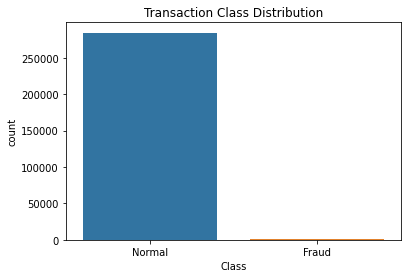

In [7]:
print(df["Class"].value_counts()) # number of normal and fradulent transactions
print(df["Class"].value_counts(normalize=True)) # proportion of normal and fradulent transactions

# barplot showing distribution of normal and fradulent data
labels = ["Normal", "Fraud"]
sns.countplot(x="Class",data=df)
plt.xticks(range(2), labels)
plt.title("Transaction Class Distribution")

Our main goal of this project is to differentiate effectively between the Target Class: Normal Transactions vs Fradulent Transactions.

We use binary coding and set "Class" as categorical variable:

0.0 : normal transactions
1.0 : fradulent transactions

There are 284315 normal transactions,
and 492 fradulent transactions.

In [8]:
# proportion of fradulent data
df["Class"].value_counts(normalize=True)[1]

0.001727485630620034

Observing the visualized plot, we see there is a huge imbalance of data. \\
Only 0.0017% of the dataset are fradulent entries. Due to imbalance of data, the Accuracy metric cannot be used to assess performance. \\
For imbalanced data, we consider using other metrics such as Precision, Recall, or F1 Score. \\
Or we can also consider resampling to make a balanced dataset and use the AUC ROC metric. 

In [9]:
# Delete unnecessary variables
df.drop(columns = "Time", inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


The feature "Time" is just a measurement of when the credit card transaction took place. \\
It is not necessary for our analysis. Thus, we eliminated the variable.

To deal with the imbalance of data issue, we use the SMOTE(Synthetic Minority Oversampling Technique).

In [14]:
# Classify the variables
X = df.loc[:,df.columns!="Class"]
y = df.loc[:,df.columns=="Class"]

We split between the X data of features and y data of labels(0 or 1).

In [15]:
# import additional models
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Oversampling
oversample = SMOTE()
X_overSamp, y_overSamp = oversample.fit_resample(X, y)

0.0    284315
1.0    284315
Name: Class, dtype: int64


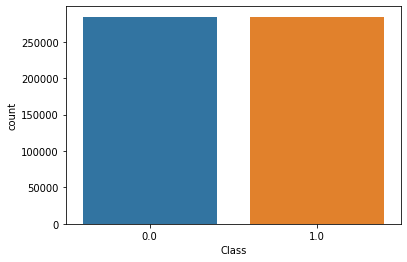

In [16]:
# achieve balance of data
sns.countplot(x="Class",data=y_overSamp)
print(y_overSamp["Class"].value_counts())

By looking at the visualization, we can see that now the dataset has been balanced between normal and fradulent cases. \\
We consider using the AUC ROC metric for assessing performance later on.

In [17]:
# transform to numpy arrays
x_data = df.iloc[:,0:-1].values
y_data = df.iloc[:,[-1]].values

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

(284807, 29) (284807, 1)


For calculation purposes we store them as the same float type data.

## Normalization

In [18]:
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)
print(x_data)

[[9.3519241e-01 7.6649040e-01 8.8136494e-01 ... 4.1897613e-01
  3.1269664e-01 5.8237929e-03]
 [9.7854203e-01 7.7006662e-01 8.4029853e-01 ... 4.1634512e-01
  3.1342265e-01 1.0470528e-04]
 [9.3521708e-01 7.5311762e-01 8.6814088e-01 ... 4.1548926e-01
  3.1191131e-01 1.4738923e-02]
 ...
 [9.9090487e-01 7.6407969e-01 7.8110206e-01 ... 4.1659316e-01
  3.1258485e-01 2.6421540e-03]
 [9.5420909e-01 7.7285570e-01 8.4958714e-01 ... 4.1851953e-01
  3.1524515e-01 3.8923896e-04]
 [9.4923186e-01 7.6525640e-01 8.4960151e-01 ... 4.1646636e-01
  3.1340083e-01 8.4464857e-03]]


To prevent data distortion I used MinMaxScaler so that the values will be between 0 and 1.

# 3. Deep Neural Networks Model (DNN)

In [19]:
# import modules for DNN design
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from keras import optimizers, metrics, callbacks

## Splitting the dataset

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2,  random_state=22)

Split the training set for learning and test set for performance measuring into ratio of 8:2

In [21]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=22)

Split the training set again to make a validation set with ratio of 8:2. This is necessary to implement EarlyStopping(=callbacks) in the future.

In [22]:
print(x_train.shape, y_train.shape) # train data
print(x_validate.shape, y_validate.shape) # validation data
print(x_test.shape, y_test.shape) # test data

(182276, 29) (182276, 1)
(45569, 29) (45569, 1)
(56962, 29) (56962, 1)


## Neural Network Design

In [23]:
# model design
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[-1],)), # input data dimenisions = number of features (29)
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid'), # activation function must be sigmoid!
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7680      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

Deep neural network with multiple hidden layers. Output layer should have dimension of 1. \\
I used the Sequential model. \\
Between hidden layers we use ReLU activation function. \\
This is a binary classification problem so we use the output layer activation function as sigmoid. \\

I used Dropout in between each hidden layer to prevent overfitting problem. \\
Batch Normalization was also applied to ensure quick and stable training process. \\

The number of neurons in each hidden layer decreases as we go down the network. \\
More information can be stored and thus more features can be learned. \\
I used softmax activation function for the previous hidden layer of the Ouput Layer.

## Model compiling

In [24]:
model.compile(optimizer=optimizers.Adam(1e-4),
              loss = "binary_crossentropy",
              metrics =  [metrics.AUC(name="AUC_ROC"),
                          metrics.Recall(name="recall"),
                          metrics.Precision(name="precision")])

In [25]:
callbacks = [tf.keras.callbacks.ModelCheckpoint('epcoh.h5')]

Setting Hyperparameters: \
\
Adam is the best optimizer in terms of performance. \
\
I switched the default learning rate to 1e-4.
After learning, the original learning rate was too large so I had to decrease it. \
\
As for the loss function I used the binary crossentropy suitable for binary classification. \
\
For performance metric, I included AUC_ROC(for comparison with SOTA), and Precision & Recall. \
\
Early Stopping method is also applied. (callbacks)

## Model Training

In [26]:
history = model.fit(x_train, y_train,
                    validation_data = (x_validate, y_validate),
                    batch_size = 65536,
                    epochs = 10000,
                    callbacks = callbacks)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
3/3 [==============================] - 0s 105ms/step - loss: 0.0021 - AUC_ROC: 0.9728 - recall: 0.8019 - precision: 0.9307 - val_loss: 0.0048 - val_AUC_ROC: 0.8765 - val_recall: 0.7284 - val_precision: 0.9672
Epoch 7502/10000
3/3 [==============================] - 0s 103ms/step - loss: 0.0020 - AUC_ROC: 0.9712 - recall: 0.8270 - precision: 0.9293 - val_loss: 0.0047 - val_AUC_ROC: 0.8827 - val_recall: 0.7407 - val_precision: 0.9677
Epoch 7503/10000
3/3 [==============================] - 0s 106ms/step - loss: 0.0021 - AUC_ROC: 0.9727 - recall: 0.8208 - precision: 0.9062 - val_loss: 0.0047 - val_AUC_ROC: 0.8827 - val_recall: 0.7531 - val_precision: 0.9683
Epoch 7504/10000
3/3 [==============================] - 0s 107ms/step - loss: 0.0020 - AUC_ROC: 0.9744 - recall: 0.8208 - precision: 0.9190 - val_loss: 0.0047 - val_AUC_ROC: 0.8827 - val_recall: 0.7531 - val_precision: 0.9683
Epoch 7505/10000
3/3 [==============================] - 0s 104ms/step - loss:

In [27]:
# Model Performance Check on Test Data: Loss, AUC_ROC, Precision, Recall
score = model.evaluate(x_test, y_test)
print(score)

1781/1781 [==============================] - 7s 4ms/step - loss: 0.0031 - AUC_ROC: 0.9301 - recall: 0.8065 - precision: 0.9494
[0.0031251548789441586, 0.9300675988197327, 0.8064516186714172, 0.949367105960846]


## Training Visualization

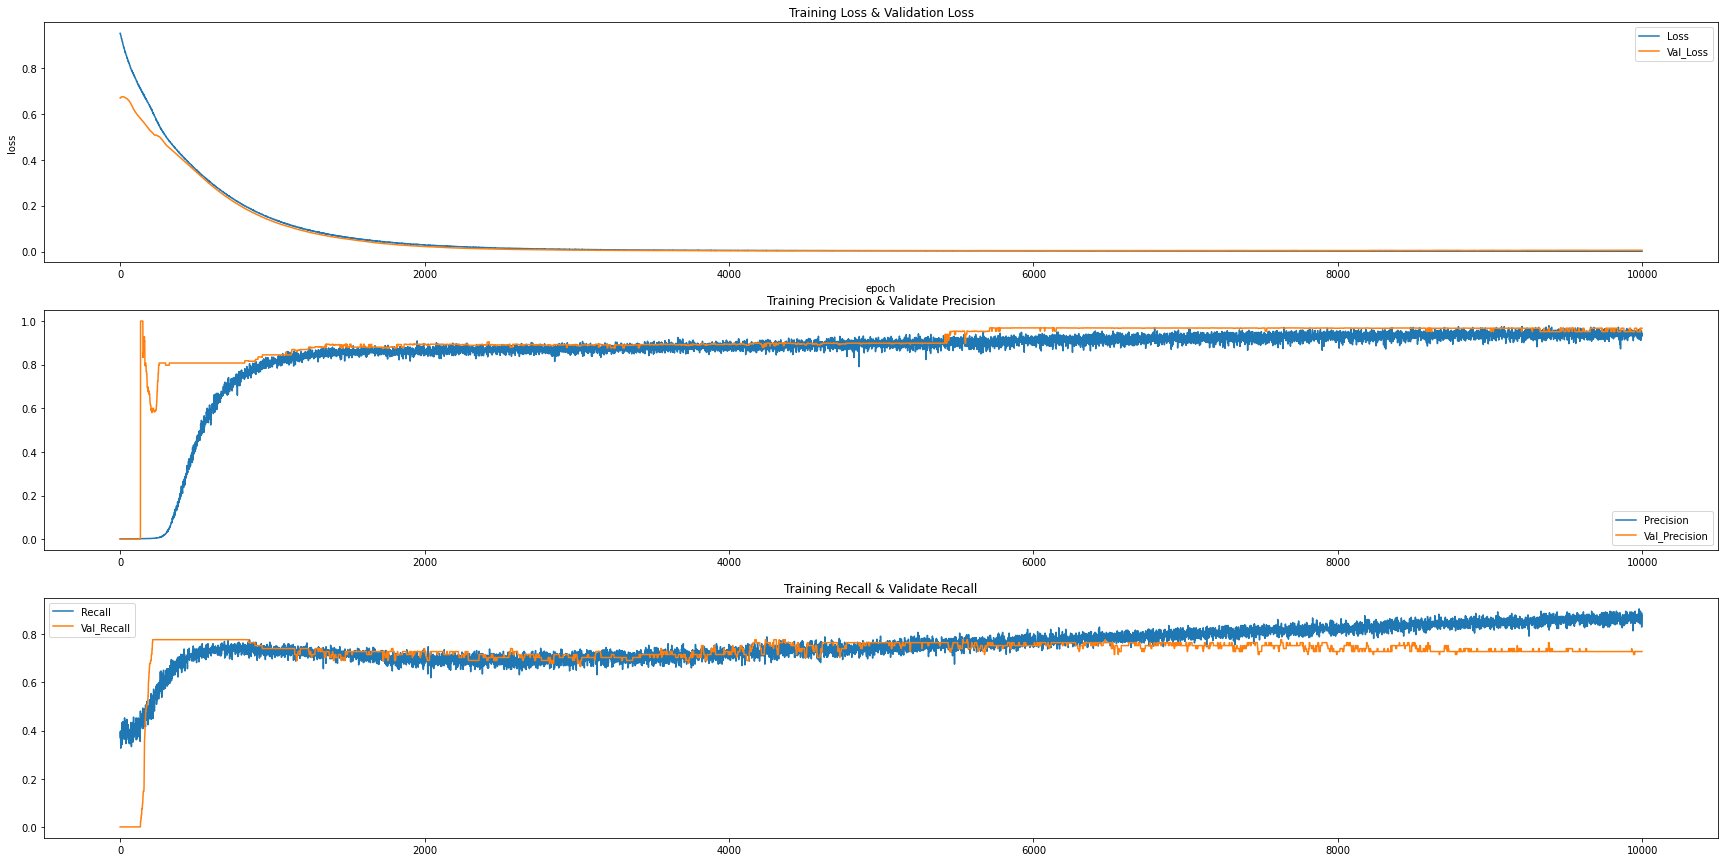

In [28]:
plt.figure(figsize = (30,15))

plt.subplot(3,1,1)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Val_Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(3,1,2)
plt.plot(history.history["precision"], label = "Precision")
plt.plot(history.history["val_precision"], label = "Val_Precision")
plt.title("Training Precision & Validate Precision")
plt.legend()

plt.subplot(3,1,3)
plt.plot(history.history["recall"], label = "Recall")
plt.plot(history.history["val_recall"], label = "Val_Recall")
plt.title("Training Recall & Validate Recall")
plt.legend()

## DNN Performance

In [30]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
# Threshold sent to 0.5
Dnn_predict = tf.cast( model.predict(x_test) > 0.5, dtype = tf.float32)
print("Test Report = \n", classification_report(Dnn_predict, y_test))

1781/1781 [==============================] - 4s 2ms/step
Test Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56883
         1.0       0.81      0.95      0.87        79

    accuracy                           1.00     56962
   macro avg       0.90      0.97      0.94     56962
weighted avg       1.00      1.00      1.00     56962



## Comparison with other Machine Learning Methods

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=22)

For traditional machine learining methods we did not use EarlyStopping by making the validation set.

### XGboost

In [32]:
from xgboost import XGBClassifier

Xgboost_model = XGBClassifier()
Xgboost_model.fit(x_train, y_train, eval_metric='aucpr')

Xg_predict = tf.cast( Xgboost_model.predict(x_test) > 0.5, dtype = tf.float32)
print("Test Report = \n", classification_report(Xg_predict, y_test))

Test Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56879
         1.0       0.84      0.94      0.89        83

    accuracy                           1.00     56962
   macro avg       0.92      0.97      0.94     56962
weighted avg       1.00      1.00      1.00     56962



### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=100, oob_score=False)
RandomForest_model.fit(x_train, y_train)

RF_predict = tf.cast( RandomForest_model.predict(x_test) > 0.5, dtype = tf.float32)
print("Test Report = \n", classification_report(RF_predict, y_test))

Test Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56883
         1.0       0.82      0.96      0.88        79

    accuracy                           1.00     56962
   macro avg       0.91      0.98      0.94     56962
weighted avg       1.00      1.00      1.00     56962



### Light Gradient Boosting

In [34]:
from lightgbm import LGBMClassifier

LGBM_model = LGBMClassifier()
LGBM_model.fit(x_train, y_train, eval_metric='aucpr')

LGBM_predict = tf.cast( LGBM_model.predict(x_test) > 0.5, dtype = tf.float32)
print("Test Report = \n", classification_report(LGBM_predict, y_test))

Test Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56838
         1.0       0.10      0.07      0.08       124

    accuracy                           1.00     56962
   macro avg       0.55      0.54      0.54     56962
weighted avg       1.00      1.00      1.00     56962



### Support Vector Machine

In [35]:
from sklearn.svm import SVC

SVC_model = SVC(kernel="rbf")
SVC_model.fit(x_train, y_train)

SVC_predict = tf.cast( SVC_model.predict(x_test) > 0.5, dtype = tf.float32)
print("Test Report = \n", classification_report(SVC_predict, y_test))

Test Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56872
         1.0       0.82      0.84      0.83        90

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Precision Comparison

In [36]:
from sklearn.metrics import precision_score

Precision_dict={}
Precision_dict["DNN"] = {"Test" : precision_score(Dnn_predict, y_test)}
Precision_dict["XGboost"] = {"Test" : precision_score(Xg_predict, y_test)}
Precision_dict["RandomForest"] = {"Test" : precision_score(RF_predict, y_test)}
Precision_dict["LGBM"] = {"Test" : precision_score(LGBM_predict, y_test)}
Precision_dict["SVM"] = {"Test" : precision_score(SVC_predict, y_test)}

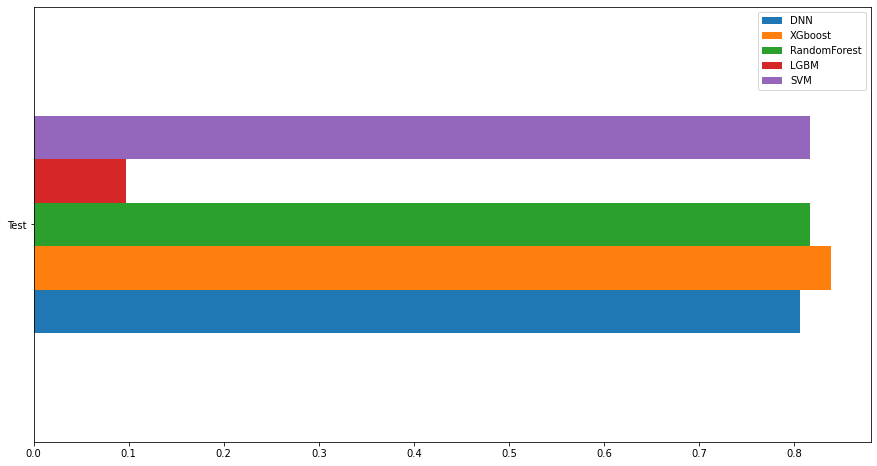

In [37]:
Precision_df = pd.DataFrame(Precision_dict)
Precision_df.plot(kind='barh', figsize=(15, 8))

### Recall Comparison

In [38]:
from sklearn.metrics import recall_score

Recall_dict={}
Recall_dict["DNN"] = {"Test" : recall_score(Dnn_predict, y_test)}
Recall_dict["XGboost"] = {"Test" : recall_score(Xg_predict, y_test)}
Recall_dict["RandomForest"] = {"Test" : recall_score(RF_predict, y_test)}
Recall_dict["LGBM"] = {"Test" : recall_score(LGBM_predict, y_test)}
Recall_dict["SVM"] = {"Test" : recall_score(SVC_predict, y_test)}

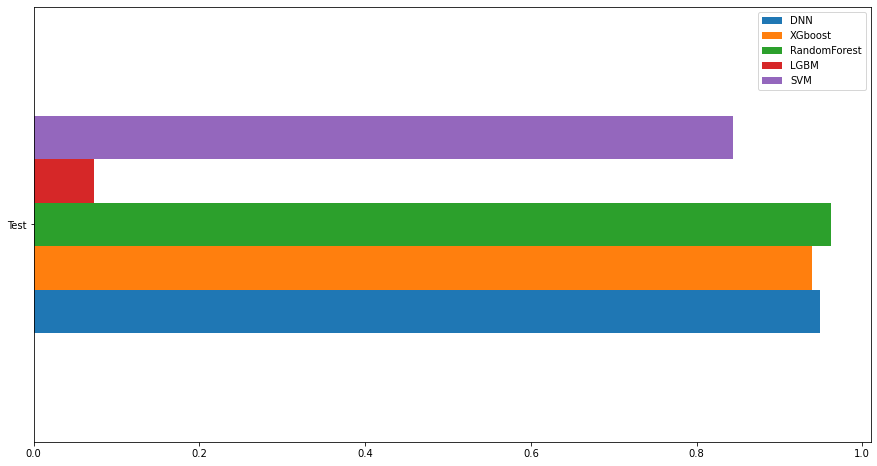

In [39]:
Recall_df = pd.DataFrame(Recall_dict)
Recall_df.plot(kind='barh', figsize=(15, 8))

### F1 Score Comparison

In [43]:
F1_dict={}
F1_dict["DNN"] = {"Test" : f1_score(Dnn_predict, y_test)}
F1_dict["XGboost"] = {"Test" : f1_score(Xg_predict, y_test)}
F1_dict["RandomForest"] = {"Test" : f1_score(RF_predict, y_test)}
F1_dict["LGBM"] = {"Test" : f1_score(LGBM_predict, y_test)}
F1_dict["SVM"] = {"Test" : f1_score(SVC_predict, y_test)}

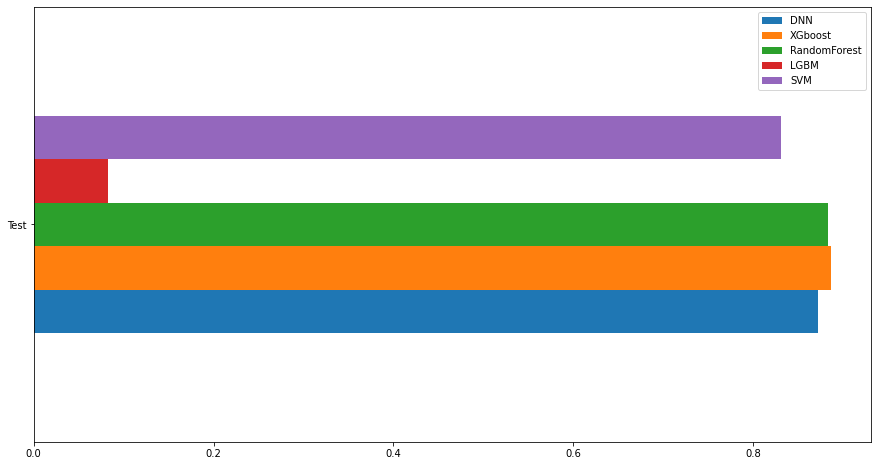

In [44]:
F1_df = pd.DataFrame(F1_dict)
F1_df.plot(kind='barh', figsize=(15, 8))

# 4. Autoencoder

## Data Preparation

In [45]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

X_train, X_test = train_test_split(df, test_size=0.2, random_state=22)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

For autoencoders, it is important to use for the training data only normal transactions, NOT FRADULENT ONES!

## Model Design

In [46]:
from keras import Input, regularizers, Model
input_dim = X_train.shape[1]

# Bottleneck Design
input_layer = Input(shape=(input_dim, ))
encoder = Dense(14, activation="tanh", name='encoder', activity_regularizer=regularizers.l1(10e-5))(input_layer)
latent = Dense(7, activation="relu",name='latent')(encoder)
decoder = Dense(7, activation='tanh',name='decoder')(latent)
output_layer = Dense(input_dim,name='output_layer')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

The autoencoder is a fully connected design as following: input-encoder-latent-decoder-output
Each layer has 29,14,7,7,29 neurons, respectively. \\
I also applied L1 regularization.

## Model Compile

In [47]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=50)
autoencoder.compile(optimizer='adam', 
                    loss='mse', 
                    metrics=['accuracy'])

## Model Training

In [48]:
history = autoencoder.fit(X_train, X_train,
                    epochs=30,
                    batch_size=256,
                    validation_data=(X_test, X_test),
                    callbacks=[early_stop]).history

Epoch 1/30
889/889 [==============================] - 4s 4ms/step - loss: 0.7983 - accuracy: 0.3799 - val_loss: 0.6832 - val_accuracy: 0.5351
Epoch 2/30
889/889 [==============================] - 5s 6ms/step - loss: 0.6164 - accuracy: 0.5647 - val_loss: 0.6042 - val_accuracy: 0.5888
Epoch 3/30
889/889 [==============================] - 3s 4ms/step - loss: 0.5728 - accuracy: 0.5917 - val_loss: 0.5857 - val_accuracy: 0.5907
Epoch 4/30
889/889 [==============================] - 3s 4ms/step - loss: 0.5583 - accuracy: 0.5905 - val_loss: 0.5737 - val_accuracy: 0.5904
Epoch 5/30
889/889 [==============================] - 3s 4ms/step - loss: 0.5473 - accuracy: 0.5975 - val_loss: 0.5656 - val_accuracy: 0.6009
Epoch 6/30
889/889 [==============================] - 3s 4ms/step - loss: 0.5379 - accuracy: 0.6142 - val_loss: 0.5546 - val_accuracy: 0.6202
Epoch 7/30
889/889 [==============================] - 3s 4ms/step - loss: 0.5296 - accuracy: 0.6242 - val_loss: 0.5477 - val_accuracy: 0.6260
Epoch 

Now we visualize the performance.

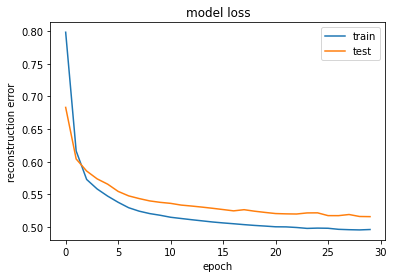

In [49]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('reconstruction error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [50]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 [==============================] - 3s 2ms/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.515257,0.001633
std,2.210901,0.040374
min,0.064416,0.000000
25%,0.200646,0.000000
50%,0.306612,0.000000
75%,0.493023,0.000000
max,224.676743,1.000000


Now we construct the AUC_ROC Curve

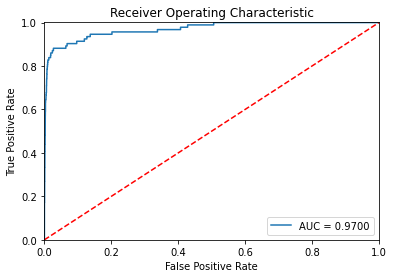

In [51]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5. Model Comparison

In [52]:
sota_dict={}
sota_dict["DNN"] = {"Test" : score[1]}
sota_dict["Autoencoder"] = {"Test" : 0.97}
sota_dict["DevNet"] = {"Test" : 0.98}
sota_dict["DIF"] = {"Test" : 0.953}

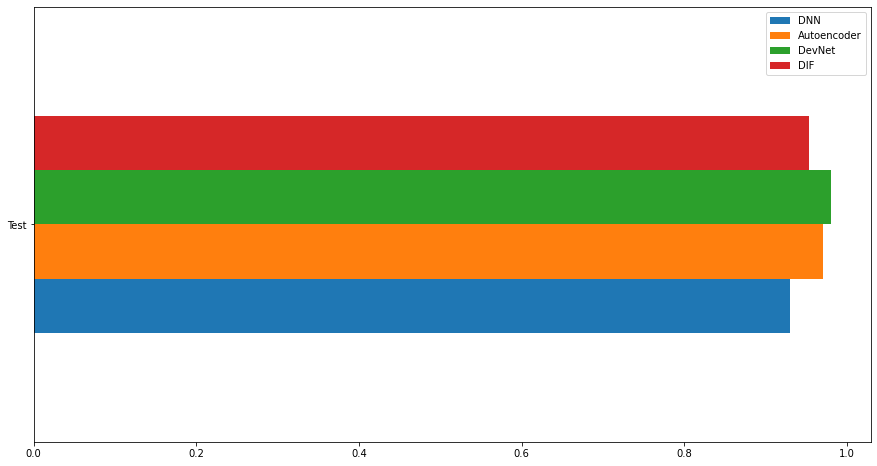

In [53]:
sota_df = pd.DataFrame(sota_dict)
sota_df.plot(kind='barh', figsize=(15, 8))